Running 2D Simulator
Running 2D Predictor
Running with Model: 2D, Velocity: 5, Mass: 11, Drag Coeff: 1, Start Time: 2024:05:11 14:00:16


FileNotFoundError: [Errno 2] No such file or directory: 'simulator_2D.csv'

SystemExit: 0

C:\Users\Leixin Xu\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


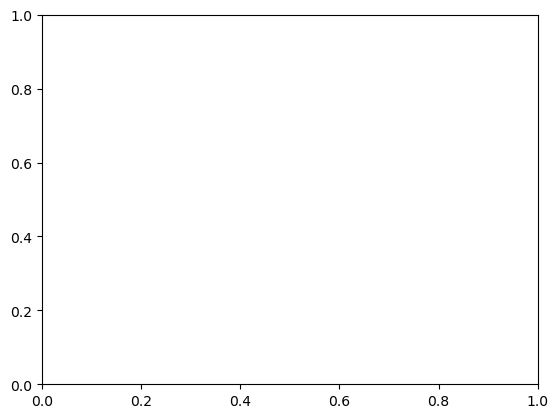

In [2]:
import sys
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from PyQt5.QtWidgets import QApplication, QWidget, QVBoxLayout, QPushButton, QLabel, QLineEdit, QRadioButton, QGroupBox, QHBoxLayout, QDateTimeEdit, QMainWindow
from PyQt5.QtCore import QDateTime
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.backends.backend_qt5agg import FigureCanvasQTAgg as FigureCanvas

class App(QWidget):
    def __init__(self):
        super().__init__()
        self.title = 'Satellite Trajectory Visualization'
        self.initUI()
        
    def initUI(self):
        self.setWindowTitle(self.title)
        self.setGeometry(100, 100, 340, 260)
        
        layout = QVBoxLayout()
        self.setLayout(layout)
        
        # Model selection
        model_group_box = QGroupBox("Model Selection")
        model_layout = QHBoxLayout()
        
        self.radio2D = QRadioButton("2D Model")
        self.radio3D = QRadioButton("3D Model")
        self.radio2D.setChecked(True)
        
        model_layout.addWidget(self.radio2D)
        model_layout.addWidget(self.radio3D)
        model_group_box.setLayout(model_layout)
        
        # Parameter inputs
        param_layout = QVBoxLayout()
        self.velocity_input = QLineEdit(self)
        self.mass_input = QLineEdit(self)
        self.drag_coeff_input = QLineEdit(self)
        
        self.start_time_input = QDateTimeEdit(QDateTime.currentDateTime(), self)
        self.start_time_input.setDisplayFormat("yyyy:MM:dd HH:mm:ss")
        
        param_layout.addWidget(QLabel("Velocity:"))
        param_layout.addWidget(self.velocity_input)
        param_layout.addWidget(QLabel("Mass:"))
        param_layout.addWidget(self.mass_input)
        param_layout.addWidget(QLabel("Drag Coefficient:"))
        param_layout.addWidget(self.drag_coeff_input)
        param_layout.addWidget(QLabel("Start Time:"))
        param_layout.addWidget(self.start_time_input)
        
        # Submit button
        submit_btn = QPushButton('Run Simulation', self)
        submit_btn.clicked.connect(self.on_click)
        
        layout.addWidget(model_group_box)
        layout.addLayout(param_layout)
        layout.addWidget(submit_btn)
    
    def on_click(self):
        model = '2D' if self.radio2D.isChecked() else '3D'
        velocity = self.velocity_input.text()
        mass = self.mass_input.text()
        drag_coeff = self.drag_coeff_input.text()
        start_time = self.start_time_input.dateTime().toString("yyyy:MM:dd HH:mm:ss")
        
        if model == "2D":
            Simulator_2D()
            Predictor_2D()
        else:
            Simulator()
            Predictor()
        
        print(f"Running with Model: {model}, Velocity: {velocity}, Mass: {mass}, Drag Coeff: {drag_coeff}, Start Time: {start_time}")
        
        self.vis_window = VisualizationWindow(model)
        self.vis_window.show()
        
class VisualizationWindow(QMainWindow):
    def __init__(self, model):
        super().__init__()
        self.title = 'Simulation and Prediction Visualization'
        self.model = model
        self.initUI()

   def initUI(self):
        self.setWindowTitle(self.title)
        self.setGeometry(100, 100, 800, 600)
        
        widget = QWidget(self)
        self.setCentralWidget(widget)
        layout = QVBoxLayout()
        widget.setLayout(layout)
        
        self.figure = plt.figure()
        self.canvas = FigureCanvas(self.figure)
        layout.addWidget(self.canvas)

        if self.model == "3D":
            self.ax = self.figure.add_subplot(111, projection='3d')
            self.draw_3d_plot()
        else:
            self.ax = self.figure.add_subplot(111)
            self.draw_2d_plot()

    def draw_plot_2d(self):
        sim_data = pd.read_csv('simulator_2D.csv')
        pred_data = pd.read_csv('predictor_2D.csv')

        earth = plt.Circle((0, 0), 1, color='blue', label='Earth')
        self.ax.add_patch(earth)

        self.ax.plot(sim_data['x'], sim_data['y'], 'ro-', label='Satellite Path')
        
        self.ax.plot(pred_data['x'], pred_data['y'], 'go--', label='Predicted Path')

        self.ax.legend()
        self.ax.grid(True)
        self.ax.set_xlabel('X Coordinate')
        self.ax.set_ylabel('Y Coordinate')
        self.ax.set_title('Satellite Trajectory and Prediction')
        self.canvas.draw()

     def draw_3d_plot(self):
        u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
        x = np.cos(u)*np.sin(v)
        y = np.sin(u)*np.sin(v)
        z = np.cos(v)
        self.ax.plot_surface(x, y, z, color='b', alpha=0.6)

        sim_data = pd.read_csv('simulator.csv')
        x, y, z = sim_data['x'], sim_data['y'], sim_data['z']

        self.sc = self.ax.scatter(x[0], y[0], z[0], color='r')

        def update(frame):
            self.sc._offsets3d = (x[frame:frame+1], y[frame:frame+1], z[frame:frame+1])
            return self.sc,

        self.ani = FuncAnimation(self.figure, update, frames=len(x), interval=50, blit=False)
        self.canvas.draw()

if __name__ == '__main__':
    app = QApplication(sys.argv)
    ex = App()
    ex.show()
    sys.exit(app.exec_())
